<a href="https://colab.research.google.com/github/Thiago-Nobre/Ola-Mundo/blob/main/Atividade_09_Thiago_Barbosa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  file_name = fn

try:
  df = pd.read_csv(file_name, sep='\t')
  display(df.head())
except Exception as e:
  print(f"Error loading the dataset: {e}")

Saving bank-additional-full.csv to bank-additional-full.csv
User uploaded file "bank-additional-full.csv" with length 5834924 bytes


,"age;""job"";""marital"";""education"";""default"";""housing"";""loan"";""contact"";""month"";""day_of_week"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""emp.var.rate"";""cons.price.idx"";""cons.conf.idx"";""euribor3m"";""nr.employed"";""y"""
0,"56;""housemaid"";""married"";""basic.4y"";""no"";""no"";..."
1,"57;""services"";""married"";""high.school"";""unknown..."
2,"37;""services"";""married"";""high.school"";""no"";""ye..."
3,"40;""admin."";""married"";""basic.6y"";""no"";""no"";""no..."
4,"56;""services"";""married"";""high.school"";""no"";""no..."


buscando os dados no computador.

In [2]:
print(f"O DataFrame tem {df.shape[0]} instâncias (linhas) e {df.shape[1]} colunas.")

O DataFrame tem 41188 instâncias (linhas) e 1 colunas.


listando os dados.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                        Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                        --------------  ----- 
 0   age;"job";"marital";"education";"default";"housing";"loan";"contact";"month";"day_of_week";"duration";"campaign";"pdays";"previous";"poutcome";"emp.var.rate";"cons.price.idx";"cons.conf.idx";"euribor3m";"nr.employed";"y"  41188 non-null  object
dtypes: object(1)
memory usage: 321.9+ KB


listando os cabeçalhos.

In [4]:
# Load the dataset again with the correct separator
try:
  df = pd.read_csv(file_name, sep=';')
  display(df.head())
except Exception as e:
  print(f"Error loading the dataset with semicolon separator: {e}")

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
# Check for null values
null_counts = df.isnull().sum()
print("Campos nulos por coluna:")
display(null_counts[null_counts > 0])

# Check for 'unknown' values in object type columns
print("\nCampos 'unknown' por coluna (apenas colunas de objeto):")
for col in df.select_dtypes(include='object').columns:
    unknown_count = (df[col] == 'unknown').sum()
    if unknown_count > 0:
        print(f"- {col}: {unknown_count}")

Campos nulos por coluna:


,0



Campos 'unknown' por coluna (apenas colunas de objeto):
- job: 330
- marital: 80
- education: 1731
- default: 8597
- housing: 990
- loan: 990


In [6]:
# Columns to check for 'unknown' values
cols_to_check = ['job', 'marital', 'education', 'default', 'housing', 'loan']

# Get the initial number of rows
initial_rows = df.shape[0]

# Filter out rows where 'unknown' is present in any of the specified columns
df_filtered = df[~df[cols_to_check].isin(['unknown']).any(axis=1)].copy()

# Get the number of rows after filtering
rows_after_filtering = df_filtered.shape[0]

print(f"Número inicial de linhas: {initial_rows}")
print(f"Número de linhas após a exclusão de 'unknown': {rows_after_filtering}")
print(f"Número de linhas removidas: {initial_rows - rows_after_filtering}")

# Display the head of the filtered dataframe
display(df_filtered.head())

Número inicial de linhas: 41188
Número de linhas após a exclusão de 'unknown': 30488
Número de linhas removidas: 10700


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Excluindo as linhas que contem dados faltando.

In [7]:
# Check for null values in the filtered DataFrame
null_counts_filtered = df_filtered.isnull().sum()
print("Campos nulos por coluna no DataFrame filtrado:")
display(null_counts_filtered[null_counts_filtered > 0])

# Check for 'unknown' values in object type columns in the filtered DataFrame
print("\nCampos 'unknown' por coluna no DataFrame filtrado (apenas colunas de objeto):")
for col in df_filtered.select_dtypes(include='object').columns:
    unknown_count_filtered = (df_filtered[col] == 'unknown').sum()
    if unknown_count_filtered > 0:
        print(f"- {col}: {unknown_count_filtered}")

Campos nulos por coluna no DataFrame filtrado:


,0



Campos 'unknown' por coluna no DataFrame filtrado (apenas colunas de objeto):


conferindo se ainda a dados faltantes.

In [11]:
# Separate features (X) and target (y)
X = df_filtered.drop('y', axis=1)
y = df_filtered['y'].apply(lambda x: 1 if x == 'yes' else 0) # Convert target to numerical (1 for 'yes', 0 for 'no')

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include='object').columns
numerical_cols = X.select_dtypes(include=np.number).columns

# Convert categorical variables to dummy/indicator variables
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

display(X.head())
display(y.head())

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,True,False,False,False,True,False
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,True,False,False,False,True,False
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,True,False,False,False,True,False
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,True,False,False,False,True,False
6,59,139,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,True,False,False,False,True,False


,y
0,0
2,0
3,0
4,0
6,0


listando novamente o banco de dados.

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Define the MLPClassifier model with initial hyperparameters
mlp = MLPClassifier(
    hidden_layer_sizes=(128, 64, 32),
    activation='relu',
    solver='adam',
    learning_rate_init=0.001,
    max_iter=300,
    batch_size=64,
    alpha=0.0001,
    verbose=True,
    early_stopping=True,
    n_iter_no_change=20,
    random_state=42
)

# Train the model
print("Training the MLPClassifier model...")
mlp.fit(X_train_scaled, y_train)
print("Training finished.")

Training the MLPClassifier model...
Iteration 1, loss = 0.23730164
Validation score: 0.900369
Iteration 2, loss = 0.20187831
Validation score: 0.909389
Iteration 3, loss = 0.19442625
Validation score: 0.908979
Iteration 4, loss = 0.18974496
Validation score: 0.912259
Iteration 5, loss = 0.18271374
Validation score: 0.904059
Iteration 6, loss = 0.17846708
Validation score: 0.909799
Iteration 7, loss = 0.17400328
Validation score: 0.907339
Iteration 8, loss = 0.16895718
Validation score: 0.899139
Iteration 9, loss = 0.16427374
Validation score: 0.908569
Iteration 10, loss = 0.15962437
Validation score: 0.899959
Iteration 11, loss = 0.15405253
Validation score: 0.902419
Iteration 12, loss = 0.14912209
Validation score: 0.902009
Iteration 13, loss = 0.14374143
Validation score: 0.896679
Iteration 14, loss = 0.13992385
Validation score: 0.892989
Iteration 15, loss = 0.13347093
Validation score: 0.903239
Iteration 16, loss = 0.12734436
Validation score: 0.901189
Iteration 17, loss = 0.123273

treinamento por 20 periodos ja que nao houve melhora siguinificativa. ( codigo simplificado pois estava rodando 300 vezes.)

In [33]:
from sklearn.model_selection import GridSearchCV

# Define a smaller parameter grid for a quicker GridSearchCV
param_grid = {
    'hidden_layer_sizes': [(64, 32), (128,)],
    'activation': ['relu'],
    'solver': ['adam'],
    'alpha': [0.001],
    'learning_rate_init': [0.001],
    'max_iter': [200, 300]
}

# Create the GridSearchCV object
# Using f1_score as the scoring metric, as requested to focus on the minority class implicitly
grid_search = GridSearchCV(MLPClassifier(random_state=42, early_stopping=True, n_iter_no_change=20), param_grid, cv=3, scoring='f1', n_jobs=-1, verbose=2)

# Perform the grid search on the training data
print("Performing GridSearchCV...")
grid_search.fit(X_train_scaled, y_train)
print("GridSearchCV finished.")

# Print the best parameters and best score
print("\nBest parameters found:")
print(grid_search.best_params_)
print("\nBest F1-score on the training set:")
print(grid_search.best_score_)

Performing GridSearchCV...
Fitting 3 folds for each of 4 candidates, totalling 12 fits
GridSearchCV finished.

Best parameters found:
{'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (64, 32), 'learning_rate_init': 0.001, 'max_iter': 200, 'solver': 'adam'}

Best F1-score on the training set:
0.5812406130113072


Performing GridSearchCV...
Fitting 3 folds for each of 4 candidates, totalling 12 fits
GridSearchCV finished.

Best parameters found:
{'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (64, 32), 'learning_rate_init': 0.001, 'max_iter': 200, 'solver': 'adam'}

Best F1-score on the training set:
0.5812406130113072


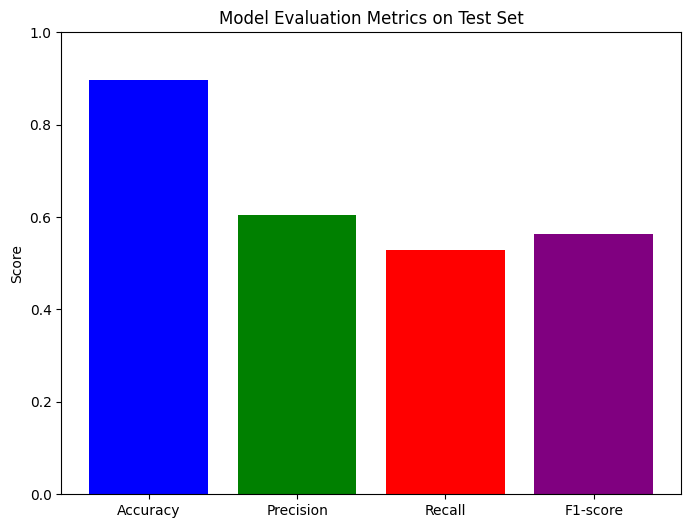

In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate the best model found by GridSearchCV on the test set
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Create a bar chart to visualize the metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['blue', 'green', 'red', 'purple'])
plt.ylabel('Score')
plt.title('Model Evaluation Metrics on Test Set')
plt.ylim(0, 1) # Set y-axis limit from 0 to 1
plt.show()

Dados de peformace do aprendizado de maquina.

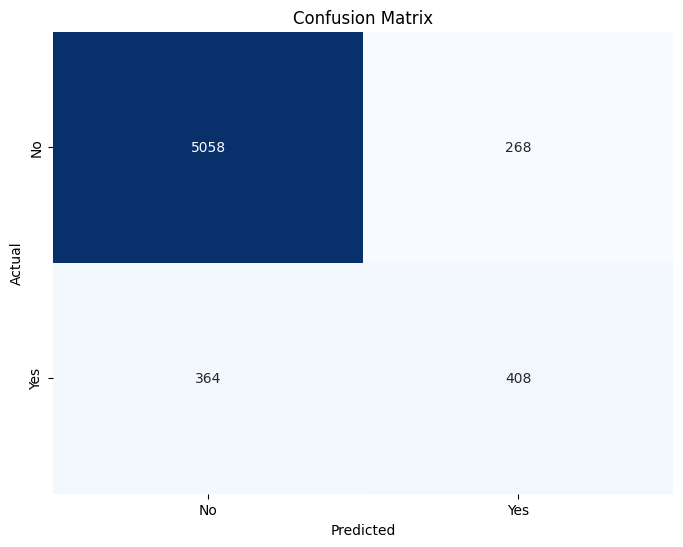

In [41]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Matrix de confusão com a taxa de acerto dos dados.

In [42]:
from sklearn.metrics import classification_report

# Generate the classification report
report = classification_report(y_test, y_pred, target_names=['No', 'Yes'])

# Print the classification report
print(report)

              precision    recall  f1-score   support

          No       0.93      0.95      0.94      5326
         Yes       0.60      0.53      0.56       772

    accuracy                           0.90      6098
   macro avg       0.77      0.74      0.75      6098
weighted avg       0.89      0.90      0.89      6098



In [45]:
param_space = {
    'hidden_layer_sizes': [(64, 32), (128, 64), (128,)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'learning_rate_init': [0.001, 0.01],
    'batch_size': [32, 64, 128],
    'alpha': [0.0001, 0.001, 0.01]
}

print("Hyperparameter space defined for exploration:")
print(param_space)

Hyperparameter space defined for exploration:
{'hidden_layer_sizes': [(64, 32), (128, 64), (128,)], 'activation': ['relu', 'tanh'], 'solver': ['adam', 'sgd'], 'learning_rate_init': [0.001, 0.01], 'batch_size': [32, 64, 128], 'alpha': [0.0001, 0.001, 0.01]}


In [46]:
import itertools

results_list = []

param_combinations = list(itertools.product(
    param_space['hidden_layer_sizes'],
    param_space['activation'],
    param_space['solver'],
    param_space['learning_rate_init'],
    param_space['batch_size'],
    param_space['alpha']
))

print(f"Total number of hyperparameter combinations to explore: {len(param_combinations)}")

# We will iterate through the combinations in the next step

Total number of hyperparameter combinations to explore: 216


In [49]:
for i, param_combination in enumerate(param_combinations):
    hidden_layer_sizes, activation, solver, learning_rate_init, batch_size, alpha = param_combination

    print(f"\nTraining combination {i+1}/{len(param_combinations)}: {param_combination}")

    # Create and train the MLPClassifier model
    mlp = MLPClassifier(
        hidden_layer_sizes=hidden_layer_sizes,
        activation=activation,
        solver=solver,
        learning_rate_init=learning_rate_init,
        batch_size=batch_size,
        alpha=alpha,
        random_state=42,
        early_stopping=True,
        n_iter_no_change=20
    )

    mlp.fit(X_train_scaled, y_train)

    # In the next steps, we will evaluate this trained model
    # For now, we just train and print the combination


Training combination 1/216: ((64, 32), 'relu', 'adam', 0.001, 32, 0.0001)

Training combination 2/216: ((64, 32), 'relu', 'adam', 0.001, 32, 0.001)

Training combination 3/216: ((64, 32), 'relu', 'adam', 0.001, 32, 0.01)

Training combination 4/216: ((64, 32), 'relu', 'adam', 0.001, 64, 0.0001)

Training combination 5/216: ((64, 32), 'relu', 'adam', 0.001, 64, 0.001)

Training combination 6/216: ((64, 32), 'relu', 'adam', 0.001, 64, 0.01)

Training combination 7/216: ((64, 32), 'relu', 'adam', 0.001, 128, 0.0001)

Training combination 8/216: ((64, 32), 'relu', 'adam', 0.001, 128, 0.001)

Training combination 9/216: ((64, 32), 'relu', 'adam', 0.001, 128, 0.01)

Training combination 10/216: ((64, 32), 'relu', 'adam', 0.01, 32, 0.0001)

Training combination 11/216: ((64, 32), 'relu', 'adam', 0.01, 32, 0.001)

Training combination 12/216: ((64, 32), 'relu', 'adam', 0.01, 32, 0.01)

Training combination 13/216: ((64, 32), 'relu', 'adam', 0.01, 64, 0.0001)

Training combination 14/216: ((64

treinamento com novos parametros.(216 epocas, aproximadamente 01h:30min de processo)

In [ ]:
import itertools
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt

results_list = []

param_combinations = list(itertools.product(
    param_space['hidden_layer_sizes'],
    param_space['activation'],
    param_space['solver'],
    param_space['learning_rate_init'],
    param_space['batch_size'],
    param_space['alpha']
))

print(f"Total number of hyperparameter combinations to explore: {len(param_combinations)}")

for i, param_combination in enumerate(param_combinations):
    hidden_layer_sizes, activation, solver, learning_rate_init, batch_size, alpha = param_combination

    print(f"\nTraining combination {i+1}/{len(param_combinations)}: {param_combination}")

    # Create and train the MLPClassifier model
    mlp = MLPClassifier(
        hidden_layer_sizes=hidden_layer_sizes,
        activation=activation,
        solver=solver,
        learning_rate_init=learning_rate_init,
        batch_size=batch_size,
        alpha=alpha,
        random_state=42,
        early_stopping=True,
        n_iter_no_change=20
    )

    mlp.fit(X_train_scaled, y_train)

    # Analyze and plot the loss curve
    plt.figure(figsize=(8, 6))
    plt.plot(mlp.loss_curve_)
    plt.title(f"Loss Curve for {param_combination}")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.show()

    # Evaluate the model
    y_pred = mlp.predict(X_test_scaled)
    report = classification_report(y_test, y_pred, target_names=['No', 'Yes'], output_dict=True)

    # Extract metrics for the 'Yes' class
    yes_metrics = report['Yes']
    metrics_names = ['Precision', 'Recall', 'F1-score']
    metrics_values = [yes_metrics['precision'], yes_metrics['recall'], yes_metrics['f1-score']]

    # Plot the metrics for the 'Yes' class
    plt.figure(figsize=(6, 5))
    bars = plt.bar(metrics_names, metrics_values, color=['green', 'red', 'purple'])
    plt.ylabel('Score')
    plt.title(f"Metrics for 'Yes' Class - {param_combination}")
    plt.ylim(0, 1)
    plt.legend(bars, metrics_names)
    plt.show()


    # Store results (optional, but good for later analysis)
    results_list.append({
        'hidden_layer_sizes': hidden_layer_sizes,
        'activation': activation,
        'solver': solver,
        'learning_rate_init': learning_rate_init,
        'batch_size': batch_size,
        'alpha': alpha,
        'f1_yes': report['Yes']['f1-score'],
        'precision_yes': report['Yes']['precision'],
        'recall_yes': report['Yes']['recall']
    })

# Convert results to a pandas DataFrame for easier analysis
results_df = pd.DataFrame(results_list)

print("\nHyperparameter exploration finished. Results stored in 'results_df'.")
display(results_df.head())

Novos graficos de apuração.